# Naive approach to RGBA$\rightarrow$RGB-HSV


In [20]:
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import importlib 
import colorxform

import colour
from colour.plotting import (
    plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931,
    plot_RGB_chromaticities_in_chromaticity_diagram_CIE1976UCS,
    colour_style,
    override_style,
    artist
)
#This version uses the colour_science library https://colour.readthedocs.io/
# in jupyter notebook remove semicolon to get list of properties
#colour_style();

space = 'Best RGB'
colourspace = colour.RGB_COLOURSPACES[space]

print(f"using {colourspace.name}")
print(colourspace)
colour.set_domain_range_scale('1')
print(colour.get_domain_range_scale())
#dir(colourspace)

using Best RGB
Best RGB
--------

Primaries          : [[ 0.73519164  0.26480836]
                      [ 0.21533613  0.77415966]
                      [ 0.13012295  0.03483607]]
Whitepoint         : [ 0.3457  0.3585]
Whitepoint Name    : D50
Encoding CCTF      : functools.partial(<function gamma_function at 0x7f4964f2e0d0>, exponent=0.45454545454545453)
Decoding CCTF      : functools.partial(<function gamma_function at 0x7f4964f2e0d0>, exponent=2.2)
NPM                : [[ 0.6318944   0.20538793  0.12701335]
                      [ 0.22760177  0.73839465  0.03400357]
                      [ 0.          0.01001892  0.81508568]]
NPM -1             : [[ 1.75737181 -0.48538023 -0.25359913]
                      [-0.54199672  1.50475404  0.02168337]
                      [ 0.00666215 -0.01849623  1.22659836]]
Derived NPM        : [[ 0.6318944   0.20538793  0.12701335]
                      [ 0.22760177  0.73839465  0.03400357]
                      [ 0.          0.01001892  0.81508568]]
De

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [4]:
def naive_RGB_to_RGBA(R, G, B):
    # find contributions of R and G that can be done with A
    A = min(R, G)
    R = R - A
    G = G - A
    return(R, G, B, A)

def naive_RGBA_to_RGB(R, G, B, A):
    # find contributions of R and G that can be done with A
    # now scale so we stay in [0,1]
    R = 1, A = 0:  result is
    
    
    R = (R + A)/(2*max(R,A))
    G = (G + A)/(2*max(G,A))
    return(R, G, B, A)
    

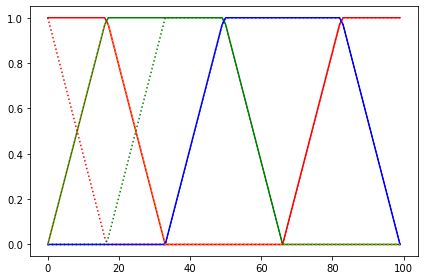

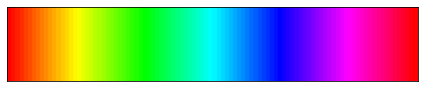

In [403]:
%matplotlib inline

# Generate RGB values for HSV spanning the hue range

HSV = [ [hue, 1.0, 1.0]  for hue in np.linspace(0., 1., num=100) ]
HSV = np.array(HSV)
gamut_RGB =  colour.HSV_to_RGB(HSV)



gamut_RGBA_naive = []
figure = plt.figure()
for RGB in gamut_RGB:
    rgba = naive_RGB_to_RGBA(RGB[0], RGB[1], RGB[2])
    gamut_RGBA_naive.append(rgba)
    
gamut_RGBA_naive = np.array(gamut_RGBA_naive)

ax2 = figure.add_subplot()
ax2.plot(gamut_RGB[:,0],'r')
ax2.plot(gamut_RGB[:,1],'g')
ax2.plot(gamut_RGB[:,2],'b')

ax2.plot(gamut_RGBA_naive[:,0],'r',linestyle='dotted')
ax2.plot(gamut_RGBA_naive[:,1],'g',linestyle='dotted')
ax2.plot(gamut_RGBA_naive[:,2],'b',linestyle='dotted')
ax2.plot(gamut_RGBA_naive[:,3], color='tab:orange', linestyle='dotted')

colour.plotting.plot_multi_colour_swatches(gamut_RGB, width=1.0, height=18.0)
figure.savefig("RGB-HSV.png")

[  0.00577841   0.68687651  -2.50694912  17.56006685 -37.34857261
  34.06893111 -11.45908063]
[  0.00577841   0.68687651  -2.50694912  17.56006685 -37.34857261
  34.06893111 -11.45908063]


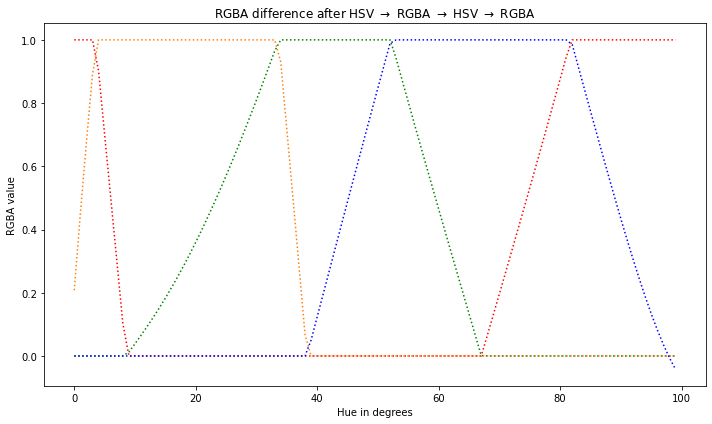

In [404]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 6.]
plt.rcParams["figure.autolayout"] = True
# Generate RGBA values for HSV spanning the hue range
importlib.reload(colorxform)
    #        print(blu_RGB)
cx = colorxform.ColorXform()

gamut_HSV = []
gamut_RGBA = []
gamut_RGBA_CIE = []
gamut_RGBA_CIE_warp = []

sat = 1.0
val = 1.0
print(poly2)
for hue in np.linspace(0., 1., num=100):
    gamut_HSV.append(np.array([hue, sat, val]))
    gamut_RGBA.append(np.array(cx.HSV_to_RGBA(hue, sat, val)))
    gamut_RGBA_CIE.append(np.array(cx.HSV_to_RGBA_CIE(hue, sat, val, warp = False)))
    gamut_RGBA_CIE_warp.append(np.array(cx.HSV_to_RGBA_CIE(hue, sat, val, warp = True)))

gamut_HSV = np.array(gamut_HSV)
gamut_RGBA = np.array(gamut_RGBA)
gamut_RGBA_CIE = np.array(gamut_RGBA_CIE)
gamut_RGBA_CIE_warp = np.array(gamut_RGBA_CIE_warp)
figure = plt.figure()
ax2 = figure.add_subplot()

# ax2.plot(gamut_RGBA[:,0],'r')
# ax2.plot(gamut_RGBA[:,1],'g')
# ax2.plot(gamut_RGBA[:,2],'b')
# ax2.plot(gamut_RGBA[:,3], color='tab:orange')

#ax2.plot(gamut_RGBA_naive[:,0],'r')
#ax2.plot(gamut_RGBA_naive[:,1],'g')
#ax2.plot(gamut_RGBA_naive[:,2],'b')
#ax2.plot(gamut_RGBA[:,3], color='tab:orange')

ax2.plot(gamut_RGBA_CIE_warp[:,0],'r',linestyle='dotted')
ax2.plot(gamut_RGBA_CIE_warp[:,1],'g',linestyle='dotted')
ax2.plot(gamut_RGBA_CIE_warp[:,2],'b',linestyle='dotted')
ax2.plot(gamut_RGBA_CIE_warp[:,3], color='tab:orange', linestyle='dotted')

plt.title("RGBA difference after HSV $ \\rightarrow $ RGBA $ \\rightarrow $ HSV $ \\rightarrow $ RGBA")
plt.ylabel("RGBA value")
plt.xlabel("Hue in degrees")
figure.savefig("RGBA-HSV-CIE.png")
print(poly2)

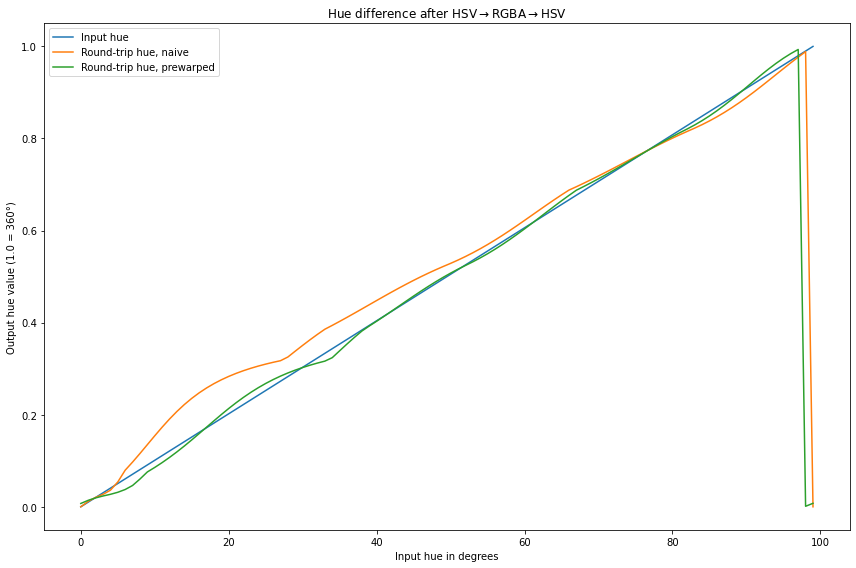

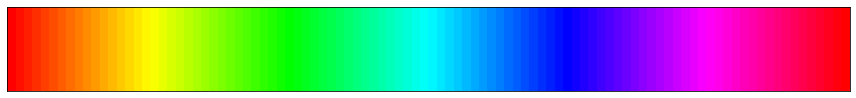

In [405]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8.]
# now convert RGBA back to HSV:
importlib.reload(colorxform)
    #        print(blu_RGB)
cx = colorxform.ColorXform()

# round-trip conversion back from original HSV, naive
HSV_RT = []
HSV_RT_warp = []
for RGBA in gamut_RGBA_CIE:
    H, S, V = cx.RGBA_to_HSV_CIE(RGBA[0], RGBA[1], RGBA[2], RGBA[3])
    HSV_RT.append(np.array([H, S, V]))

for RGBA in gamut_RGBA_CIE_warp:
    H, S, V = cx.RGBA_to_HSV_CIE(RGBA[0], RGBA[1], RGBA[2], RGBA[3])
    HSV_RT_warp.append(np.array([H, S, V]))

HSV_RT = np.array(HSV_RT)
HSV_RT_warp = np.array(HSV_RT_warp)

# hack! Fix up wrapped entries
#HSV_RT[-1 ,0] += 1.
#HSV_RT[-2 ,0] += 1.

figure = plt.figure()
ax2 = figure.add_subplot()
ax2.plot(gamut_HSV[:,0],label='Input hue')
ax2.plot(HSV_RT[:,0], label='Round-trip hue, naive')
ax2.plot(HSV_RT_warp[:,0], label='Round-trip hue, prewarped')
#ax2.plot(HSV_fix[:,0], label='Round-trip hue, corrected')
plt.title("Hue difference after HSV$\\rightarrow$RGBA$\\rightarrow$HSV")
ax2.legend()
plt.ylabel(u"Output hue value (1.0 = 360\u00B0)")
plt.xlabel("Input hue in degrees")
colour.plotting.plot_multi_colour_swatches(gamut_RGB, width=1.0, height=10.0)
figure.savefig("HSV_vs_HSVRT.png")

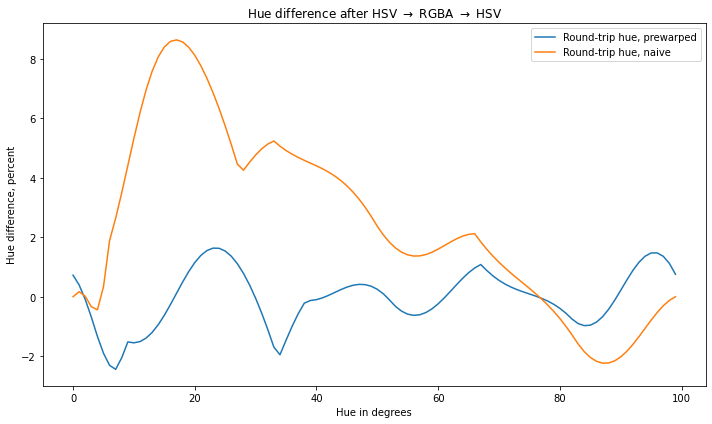

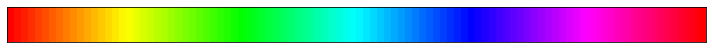

-0.000419655478663
-0.0244203972575 0.0163332599025


In [407]:
%matplotlib inline
plt.rcParams['text.usetex'] = False
plt.rcParams["figure.figsize"] = [10, 6.]
plt.rcParams["figure.autolayout"] = True

figure = plt.figure()
ax2 = figure.add_subplot()
diff_naive = np.array(HSV_RT[:,0] - gamut_HSV[:,0])
diff_naive[diff_naive < -0.5] += 1 
diff_naive[diff_naive > 0.5] -= 1 


diff_warp = np.array(HSV_RT_warp[:,0] - gamut_HSV[:,0])
diff_warp[diff_warp < -0.5] += 1 
diff_warp[diff_warp > 0.5] -= 1 


ax2.plot(100*diff_warp, label='Round-trip hue, prewarped')
ax2.plot(100*diff_naive, label='Round-trip hue, naive')


ax2.legend()
plt.title("Hue difference after HSV $ \\rightarrow $ RGBA $ \\rightarrow $ HSV")
plt.ylabel("Hue difference, percent")
plt.xlabel("Hue in degrees")
colour.plotting.plot_multi_colour_swatches(gamut_RGB, width=1.0, height=5.0)
figure.savefig("HSV_vs_HSVRT.png")

print(np.mean(diff_warp))
print(np.min(diff_warp),  np.max(diff_warp) )

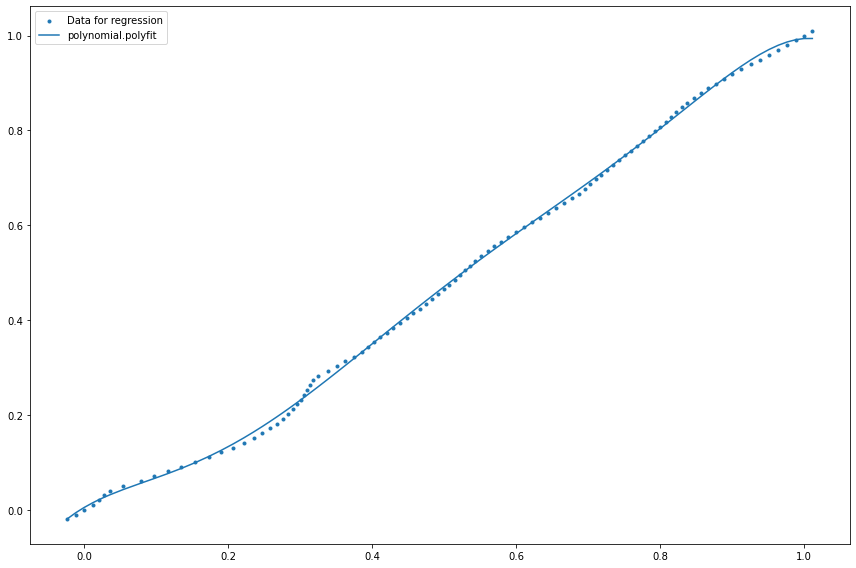

[  0.00489463   0.88927615  -4.89758312  27.8397943  -57.61888303
  52.67409281 -17.89779315]


In [408]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [12, 8.]
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt


def polywarp(x, coeff=None):
    if coeff is None:
        coeff_w = [0.00577841,  0.68687651, -2.50694912, 17.56006685
                       -37.34857261, 34.06893111 -11.45908063]
    xn = 1
    res = 0.
    for c in coeff:
        res += c * xn
        xn = xn *x
    return(res)
    

#y = gamut_HSV[:-1, 0]
#x = HSV_RT[:-1,0]

y = gamut_HSV[:-1, 0]
x = HSV_RT[:-1,0]

# extend by n points on either end
n = 2
yex = np.append(y, y[0:n] + 1.0)
xex = np.append(x, x[0:n] + 1.0)

yex = np.append(y[-n:] -1.0, yex)
xex = np.append(x[-n:] -1.0, xex)


# extend y and X so fit at ends are better
plt.scatter(xex, yex, marker='.', label='Data for regression')

poly2 = polyfit(xex, yex, 6)
z = np.array([polywarp(X, poly2) for X in xex])
plt.plot(xex, np.poly1d(poly2[::-1])(xex), label='polynomial.polyfit')


#plt.plot(x, z, label='polynomial.polyfit')
#plt.plot(x, np.poly1d(poly2[::-1])(x), label='polynomial.polyfit')
plt.legend()
plt.show()
with np.printoptions(suppress=True):
    print(poly2)


<IPython.core.display.Javascript object>


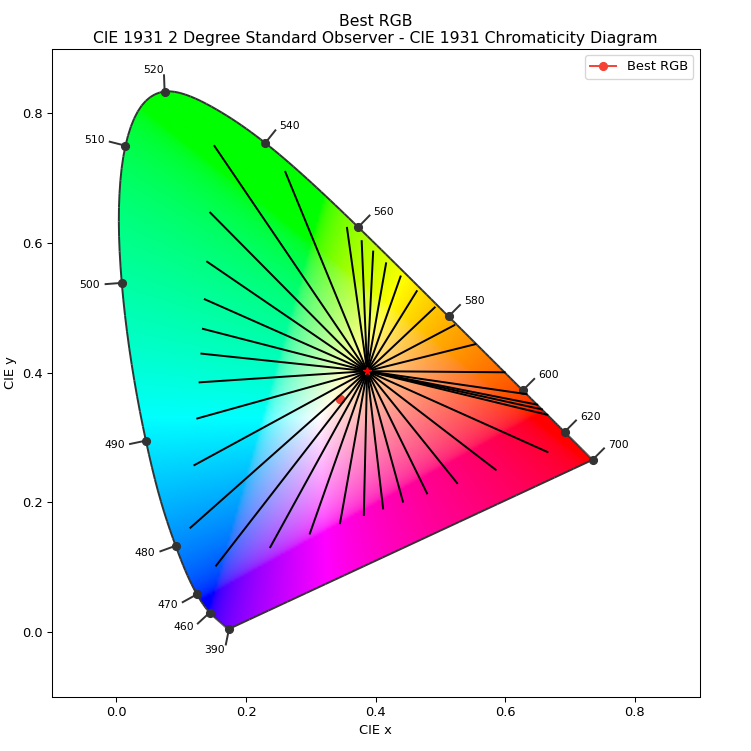

60


In [194]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = [8, 8.]
plt.rcParams["figure.autolayout"] = True

importlib.reload(colorxform)
    #        print(blu_RGB)
cx = colorxform.ColorXform()


figure = plt.figure()
    
axes = figure.add_subplot()
#axes = figure.add_subplot(212)

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(
#    RGB = gamut_RGB,
    RGB = [],
    colourspace =  space,
    #colourspace = 'RGB_COLOURSPACE_BEST_RGB',
    axes = axes,
            #        colourspaces=["ACEScg"],
    colourspaces=[],
    scatter_kwargs={'c': 'k', 'marker': '+'},
    show_pointer_gamut = False,
    show_self_whitepoints = False,
    kwargs={'pointer_gamut_opacity': 0.0}

)
# get children now before we add anything so we can remove gamut later
ch = figure.get_children()
#print(ch)
ch = ch[1].get_children()

print(len(ch))
ch[46].remove()


#axes.plot([cx.white_xy[0], cx.red630_xy[0]], [cx.white_xy[1], cx.red630_xy[1]],  'k' )


gamut_xy = []
for rgba in gamut_RGBA_CIE:

    xy = cx.RGBA_to_xy_geom(rgba[0], rgba[1], rgba[2], rgba[3])
    #xy = colour.RGB_to_xy([rgba[0], rgba[1], rgba[2]])
    gamut_xy.append(xy)
    axes.plot([cx.LED_white_xy[0], xy[0]], [cx.LED_white_xy[1], xy[1]],  'k' )


gamut_xy = np.array(gamut_xy)

axes.plot(cx.LED_white_xy[0], cx.LED_white_xy[1], 'r*')

# xxyy_sat = []
# for rgba in sat_RGBA:

#     xy_sat = cx.RGBA_to_xy_geom(rgba[0], rgba[1], rgba[2], rgba[3])
#     axes.plot(xy_sat[0], xy_sat[1],  'k+' )
#     xxyy_sat.append(xy_sat)
    
# xxyy_sat = np.array(xxyy_sat)
    
# for i, sat in enumerate(xxyy_sat):
#     #axes.plot([xxyy[i][0], sat[0]], [xxyy[i][1], sat[1]],  'k' )
#     axes.plot([cx.LED_white_xy[0], sat[0]], [cx.LED_white_xy[1], sat[1]],  'k' )


# calculate white point for fully saturated gamut
#print(np.mean(gamut_xy[:,0]))    
#print(np.mean(gamut_xy[:,1]))    
    


#figure.canvas.draw()
#figure.show()
#xes.redraw_in_frame()
figure.savefig("CIE-gamut-warped.png")

<IPython.core.display.Javascript object>


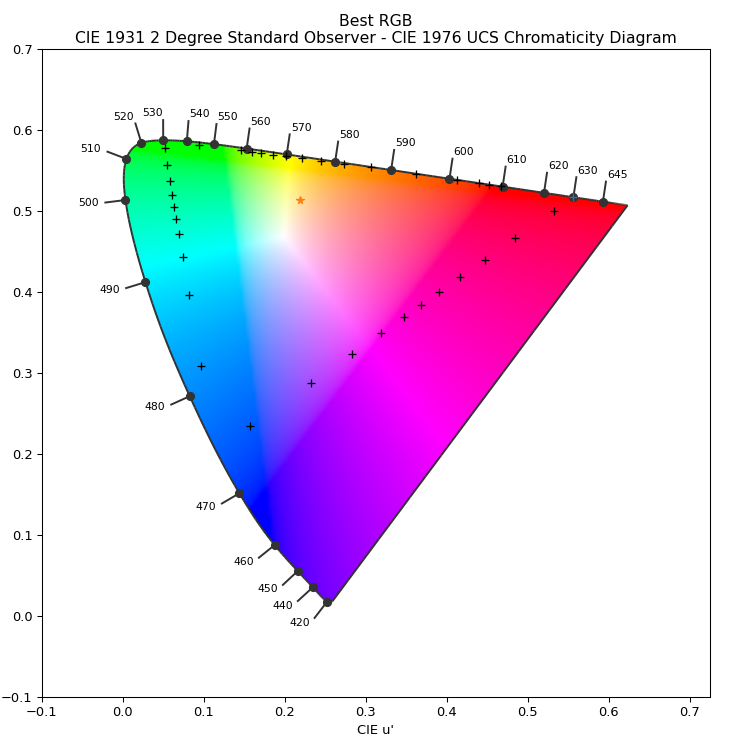

86
[ 0.21938762  0.51326637]
[ 0.55648558  0.51650767]


In [197]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = [8, 8.]
plt.rcParams["figure.autolayout"] = True

space = 'Best RGB'
colourspace = colour.RGB_COLOURSPACES[space]

figure = plt.figure()
    
axes = figure.add_subplot()
#axes = figure.add_subplot(212)

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1976UCS(
    RGB = [],
    #colourspace = "sRGB"
    colourspace = space,
    #colourspace = 'RGB_COLOURSPACE_BEST_RGB',
    axes = axes,
            #        colourspaces=["ACEScg"],
    colourspaces=[],
    scatter_kwargs={'c': 'k', 'marker': 'x'},
    show_pointer_gamut = False,
    show_whitepoints = False,
    kwargs={'pointer_gamut_opacity': 0.0}

)
# get children now before we add anything so we can remove gamut later
ch = figure.get_children()
#print(ch)
ch = ch[1].get_children()

print(len(ch))
for i in range(70,len(ch)):
    try:
        
        ch[i].remove()
    except:
        pass

sat_uv = []    
unsat_uv = []

for rgba in gamut_RGBA_CIE:

    xy_sat = cx.RGBA_to_xy_geom(rgba[0], rgba[1], rgba[2], rgba[3])
    uv_sat = colour.xy_to_Luv_uv(xy_sat)
    axes.plot(uv_sat[0], uv_sat[1], 'k+')

# #    axes.plot(xy_sat[0], xy_sat[1],  'k+' )
  

red630_uv = colour.xy_to_Luv_uv(cx.red630_xy)
#grn530_uv = gamut_uv[1]
#blu475_uv = gamut_uv[2]

axes.plot(red630_uv[0], red630_uv[1], '+')


white_uv = colour.xy_to_Luv_uv(cx.LED_white_xy)
axes.plot(white_uv[0], white_uv[1], '*')
print(white_uv)

print(red630_uv)
#print(blu475_uv)
# axes.plot([red630_uv[0], blu475_uv[0], grn530_uv[0], red630_uv[0]],
#           [red630_uv[1], blu475_uv[1], grn530_uv[1], red630_uv[1]],
#           'k' , linestyle='dotted')

#wht_uv = (red630_uv + blu475_uv + grn530_uv)/3.

#org_uv = gamut_uv[3]
#print(org_uv)
#axes.text(org_uv[0], org_uv[1], "orange LED")
#axes.text(wht_uv[0], wht_uv[1], "White")
#figure.canvas.draw()
#figure.show()
#axes.redraw_in_frame()
#plt.off()
figure.savefig("Luv-gamut-warped.png")

In [ ]:
# compute whiute uv:


In [306]:

def uv_angle(uv, red_offset=None):
    import math
        
    #D50 colorpoint from Best RGB colorspace
    #white_xy = self.D65_xy

    white_xy = np.array([ 0.55648558,  0.51650767])



    uv_vec = [white_uv[0] - uv[0], white_uv[1] - uv[1]]
    # calculate angle and offset so red is = zero = 360
    if red_offset is None:
        # horrible hack constant but it works
        red_offset = 0.

    hue_angle = (1/(2*math.pi))*math.atan2(uv_vec[0], uv_vec[1])
    return((2.0 - red_offset - hue_angle)%1.)



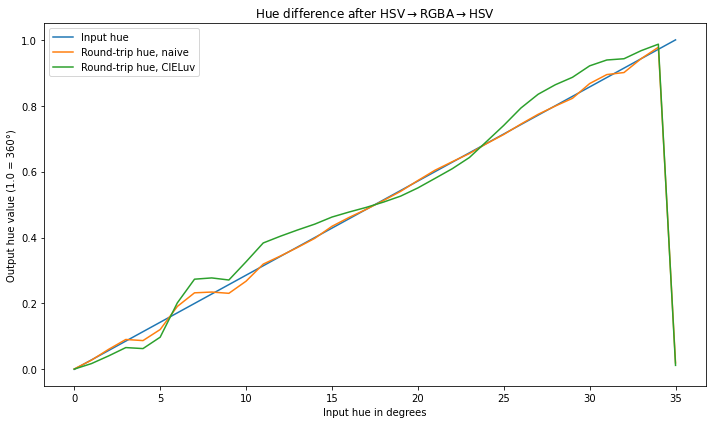

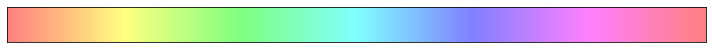

In [442]:
%matplotlib inline
plt.rcParams['text.usetex'] = False
plt.rcParams["figure.figsize"] = [10, 6]

red_offset=uv_angle(colour.xy_to_Luv_uv(cx.red630_xy))

hue_uv = np.array([uv_angle(sat, red_offset) for sat in sat_uv])


figure = plt.figure()
ax2 = figure.add_subplot()
ax2.plot(gamut_HSV[:,0],label='Input hue')
ax2.plot(HSV_RT[:,0], label='Round-trip hue, naive')
ax2.plot(hue_uv, label='Round-trip hue, CIELuv')
#ax2.plot(HSV_fix[:,0], label='Round-trip hue, corrected')
plt.title("Hue difference after HSV$\\rightarrow$RGBA$\\rightarrow$HSV")
ax2.legend()
plt.ylabel(u"Output hue value (1.0 = 360\u00B0)")
plt.xlabel("Input hue in degrees")
colour.plotting.plot_multi_colour_swatches(gamut_RGB, width=1.0, height=18.0)
figure.savefig("HSV_vs_HSVRT.png")

In [ ]:
def uv_to_RGBA(uv):
    import math
    ''' convert color/luminance specification in CIE XYZ coordinates to hsv
       This version uses the colour_science library https://colour.readthedocs.io/'''
    red_angle = 283.53
    org_angle = 254.01
    grn_angle = 162.59
    blu_angle = 33.67
    
    #D50 colorpoint from Best RGB colorspace
    white_xy = [ 0.3457,  0.3585]

    #red< 283.52 org< 254.014 grn< 162.59 blu< 33.67
    #print(f"red< {red_angle} org< {org_angle} grn< {grn_angle} blu< {blu_angle}")

    x, y, Y = cx.XYZ_to_xyY(X, Y, Z)
    tmp_vec = [white_xy[0] - x, white_xy[1] - y]
    inp_angle = hue_angle(tmp_vec)

    # fractions of the primaries we need to mix to get this hue
    red_frac = 0.
    org_frac = 0.
    grn_frac = 0.
    blu_frac = 0.
    
    # figure out what quadrant of the RGBA gamut we are in
    # angle increases counterclockwise so work backwards from red to blue
    if inp_angle >= red_angle or inp_angle < blu_angle:
        quad = "red-blu"
        # figure out fraction of angle between red and blue vector
        if inp_angle < blu_angle:
            # add 360 to avoid zero wraparound
            inp_angle = inp_angle + 360
        blu_frac = (inp_angle - red_angle)/(blu_angle + 360 - red_angle) 
        red_frac = 1.0 - blu_frac
        assert(blu_frac >= 0)
        
#                                     grn_pri
#                                         \            
#                                          \ (org_frac)           
#                                           \            
#                                            \            
#         white ------- temp_xy-----------gamut_intercept
#                                              \            
#                                               \            
#                                                \ (grn_frac)           
#                                                 \            
#                                               org_pri
        
        # find intercept point at gamut which is maximum saturation
        #x_gam = blu_frac*(blu_pri) + red_frac*(red_pri)
        x_gam = blu_frac*(blu_vec) + red_frac*(red_vec)

        # saturation is fraction of distance from white to fully saturated (gamut intercept)
        # so 1 - ratio of lenghs of vector from white to fully saturated
        
        
    elif inp_angle >= org_angle:
        quad ="org-red"

        red_frac = (inp_angle - org_angle)/(red_angle - org_angle)
        org_frac = 1. - red_frac
        assert(red_frac >= 0)
#        x_gam = org_frac*(org590_xy) + red_frac*(red_pri)
        x_gam = org_frac*(org_vec) + red_frac*(red_vec)


        
    elif inp_angle >= grn_angle:
        quad = "grn-org"
        org_frac = (inp_angle - grn_angle)/(org_angle - grn_angle)
        grn_frac = 1. - org_frac
        assert(grn_frac >= 0)
#        x_gam = org_frac*(org590_xy) + grn_frac*(grn_pri)
        x_gam = org_frac*(org_vec) + grn_frac*(grn_vec)
        
    elif inp_angle >= blu_angle:
        quad = "blu-grn"
        grn_frac = (inp_angle - blu_angle)/(grn_angle - blu_angle)
        blu_frac = 1. - grn_frac
        assert(blu_frac >= 0)
#        x_gam = blu_frac*(blu_pri) + grn_frac*(grn_pri)
        x_gam = blu_frac*(blu_vec) + grn_frac*(grn_vec)

    else: # wrap around or negative
        print(" oops impossible color")
        assert(False)


    sat_x = x_gam[0]
    sat_y = x_gam[1]
    #x_sat = x_gam
    sat = math.sqrt(tmp_vec[0]**2 + tmp_vec[1]**2)/math.sqrt(sat_x**2 + sat_y**2)
        
    #print(quad)
    #print(f"red frac {red_frac} org_frac {org_frac} grn_frac {grn_frac} blu< {blu_frac}")

    return(red_frac, grn_frac, blu_frac, org_frac, sat)

In [ ]:
%matplotlib auto
plt.rcParams["figure.figsize"] = [7.50, 7.]
plt.rcParams["figure.autolayout"] = True


figure = plt.figure()
    
axes = figure.add_subplot()
#axes = figure.add_subplot(212)

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1976UCS(
    RGB = mix_RGB,
    #colourspace = "sRGB"
    colourspace = space,
    #colourspace = 'RGB_COLOURSPACE_BEST_RGB',
    axes = axes,
            #        colourspaces=["ACEScg"],
    colourspaces=[],
    scatter_kwargs={'c': 'k', 'marker': 'x'},
    show_pointer_gamut = False,
    show_whitepoints = False,
    kwargs={'pointer_gamut_opacity': 0.0}

)

In [279]:

# now convert to xy and plot

for c_xy in cx.gamut_RGBA_xy():
    X, Y, Z = cx.xyY_to_XYZ(c_xy[0], c_xy[1], 0.5)
    gamut_rgb.append(cx.XYZ_to_RGB(X, Y, Z, gamma=False))


# test of functions above
mix = 0.
min_sat = 0.15
colour.set_domain_range_scale('1')

ring_xy = []
for angle in np.linspace(0, 2*np.pi, num=37):
    # radius is min_sat because we just want to touch gamut triangle, not exceed it
    temp_xy = colourspace.whitepoint + min_sat*np.array([np.cos(angle), np.sin(angle)])
    ring_xy.append(temp_xy)    

ring_xy = np.array(ring_xy)

circ_XYZ = []
circ_RGB = []

# convert to RGB from xy space
# for temp_xy in ring_xy:
#     temp_XYZ = colour.xy_to_XYZ(temp_xy)

for temp_xy in gamut_XYZ:


    circ_XYZ.append(temp_XYZ)
    temp_RGB = colour.XYZ_to_RGB(temp_XYZ,
                        colourspace.whitepoint,
                        colourspace.whitepoint,
                        colourspace.matrix_XYZ_to_RGB,
                        chromatic_adaptation_transform = 'Bradford')  

    temp_RGB = np.array(temp_RGB)
    if True
        circ_RGB.append(np.power(temp_RGB,2.2))
    else:
        #print(temp_RGB)
        circ_RGB.append(temp_RGB/np.max(temp_RGB))
        
# test adding orange LED to our RGB array    
org_RGB = []
rgba = []
sat = []

# mix in amber from 0.0 - 1.0 intensity
amber = 0.0
org_XYZ = []
for rgb  in circ_RGB:
    
    R = rgb[0]**( 1 / 2.2 )
    G = rgb[1]**( 1 / 2.2 )
    B = rgb[2]**( 1 / 2.2 )
    A = amber**( 1 / 2.2 )

    temp_XYZ = RGBA_to_XYZ_mine(R, G, B, A, colourspace)
    #temp_XYZ = temp_XYZ/temp_XYZ[1]
    org_XYZ.append(temp_XYZ)

#     temp_RGB = colour.XYZ_to_RGB(temp_XYZ,
#                         colourspace.whitepoint,
#                         colourspace.whitepoint,
#                         colourspace.matrix_XYZ_to_RGB,
#                         chromatic_adaptation_transform = None)  

    temp_RGB = np.array(cx.xyz_to_rgb(temp_XYZ[0],temp_XYZ[1],temp_XYZ[2]))

    
    if True:        
        org_RGB.append(temp_RGB)
    else:
        org_RGB.append(temp_RGB/np.max(temp_RGB))
        
        
    # clamp neagtive value to 0

circ_RGB = np.array(circ_RGB,dtype=float)
#mix_RGB = mix_RGB/np.max(np.max(mix_RGB))
#mix_RGB[mix_RGB < 0] = 0.

org_RGB = np.array(org_RGB,dtype=float)
#org_RGB = org_RGB/np.max(np.max(org_RGB))
#mix_RGB[mix_RGB < 0] = 0.


#print(ring_RGB)
#print(mix_RGB)

print(np.max(org_RGB[:,0]))
print(np.max(org_RGB[:,1]))
print(np.max(org_RGB[:,2]))


SyntaxError: invalid syntax (1190477926.py, line 39)

In [ ]:
# test XYZ to RGB
%matplotlib inline 
mix = 0.
min_sat = 0.01
colour.set_domain_range_scale('1')

ring_xy = []
for angle in np.linspace(0, 2*np.pi, num=37):
    # radius is min_sat because we just want to touch gamut triangle, not exceed it
    temp_xy = colourspace.whitepoint + min_sat*np.array([np.cos(angle), np.sin(angle)])
    ring_xy.append(temp_xy)    

ring_xy = np.array(ring_xy)

circ_XYZ = []
circ_RGB = []

ambr_XYZ = []
ambr_RGB = []
# convert to RGB from xy space

# for temp_xy in ring_xy:
#     temp_XYZ = colour.xy_to_XYZ(temp_xy)

for temp_xy in gamut_XYZ:
    temp_XYZ = temp_XYZ/2.0
    circ_XYZ.append(temp_XYZ)

    temp_RGB = colour.XYZ_to_RGB(temp_XYZ,
                         colourspace.whitepoint,
                         colourspace.whitepoint,
                         colourspace.matrix_XYZ_to_RGB) 

    #temp_RGB = color.rgb2xyz(temp_XYZ)
    
    circ_RGB.append(temp_RGB)
    
    #------------------------------ we have XYZ and RGB, now try adding A to XYZ and conv
    R = temp_RGB[0]
    G = temp_RGB[1]
    B = temp_RGB[2]
    A = 0.9

    temp_XYZ = RGBA_to_XYZ_works(R, G, B, A, colourspace)
    temp_XYZ = temp_XYZ/1.4
    ambr_XYZ.append(temp_XYZ)

    temp_RGB = colour.XYZ_to_RGB(temp_XYZ,
                         colourspace.whitepoint,
                         colourspace.whitepoint,
                         colourspace.matrix_XYZ_to_RGB) 
    ambr_RGB.append(temp_RGB)
    
    
circ_XYZ = np.array(circ_XYZ)
ambr_XYZ = np.array(ambr_XYZ)
circ_RGB = np.array(circ_RGB)
ambr_RGB = np.array(ambr_RGB)



In [ ]:
figure = plt.figure()

print()

sat = np.array(sat)
ax2 = figure.add_subplot()
ax2.plot(circ_RGB[:,0],'r')
ax2.plot(circ_RGB[:,1],'g')
ax2.plot(circ_RGB[:,2],'b')

ax2.plot(circ_XYZ[:,1],'k')

colour.plotting.plot_multi_colour_swatches(circ_RGB/1.6)

In [ ]:
figure = plt.figure()

sat = np.array(sat)
ax2 = figure.add_subplot()
ax2.plot(ambr_RGB[:,0],'r')
ax2.plot(ambr_RGB[:,1],'g')
ax2.plot(ambr_RGB[:,2],'b')
ax2.plot(ambr_XYZ[:,1],'k')



In [ ]:
figure = plt.figure()

axes = figure.add_subplot()
rgba = np.array(org_RGB)
axes.plot(rgba[:,0],'r')
axes.plot(rgba[:,1],'g')
axes.plot(rgba[:,2],'b')
axes.plot(sat,'k')

# axes.plot(org_mix[:,0],'c')
# axes.plot(org_mix[:,1],'c')
# axes.plot(org_mix[:,2],'c')

#------------------------

# ring_XYZ = np.array(ring_XYZ)
# ax3d = figure.add_subplot(projection='3d')
# ax3d.scatter(ring_XYZ[:,0], ring_XYZ[:,1], ring_XYZ[:,2])
#ax3d.scatter(mix_RGB[:,0], mix_RGB[:,1], mix_RGB[:,2])

In [ ]:
#%matplotlib auto
#%matplotlib inline
%matplotlib notebook

plt.rcParams["figure.figsize"] = [12., 8]
#plt.rcParams["figure.autolayout"] = True

figure = plt.figure()
    
axes = figure.add_subplot()
#axes = figure.add_subplot(212)

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(
    RGB = ambr_RGB,
    colourspace =  colourspace.name,
#    colourspace =  space,
    axes = axes,
    colourspaces=[],
    scatter_kwargs={'c': 'k', 'marker': '+'},
)

# plot the gamut
# axes.plot([red630_xy[0], grn530_xy[0],  blu475_xy[0], red630_xy[0]],
#           [red630_xy[1], grn530_xy[1],  blu475_xy[1], red630_xy[1]], 'k' , linestyle='dotted')

# plot green LED primary
#axes.plot([grn530_xy[0]], [grn530_xy[1]], 'kX', markersize=10)

# plot blue LED primary
#axes.plot([blu475_xy[0]], [blu475_xy[1]], 'kX',markersize=10)

# plot red LED primary
#axes.plot([red630_xy[0]], [red630_xy[1]], 'kX',markersize=10)

# plot orange LED primary
axes.plot([org590_xy[0]], [org590_xy[1]], 'kX',markersize=5)

axes.text(org590_xy[0] + 0.02, org590_xy[1], "amber LED")

# plot whitepoint
axes.plot([colourspace.whitepoint[0]], [colourspace.whitepoint[1]], color='k', marker='*',markersize=10)

for temp_xy in ring_xy:
    axes.plot([temp_xy[0]], [temp_xy[1]], 'k' , marker='x')

axes.text(0.6, 0.6, f"Mix: {10*mix:}% amber")

grn_frac = 0.5
blu_frac = 1. - grn_frac
x_gam = blu_frac*(blu_pri) + grn_frac*(grn_pri)
#x_sat = x_gam - white_xy
#sat = 1. -  math.sqrt(tmp_vec[0]**2 + tmp_vec[1]**2)/math.sqrt(x_sat[0]**2 + x_sat[1]**2)
axes.plot([x_gam[0]], [x_gam[1]], color='k', marker='*',markersize=10)



#figure.canvas.draw()
#figure.show()
#axes.redraw_in_frame()
#plt.off()
#figure.savefig(f"ambermix{10*mix}.png")

In [ ]:
#%matplotlib auto
%matplotlib inline

plt.rcParams["figure.figsize"] = [12., 8]
#plt.rcParams["figure.autolayout"] = True

figure = plt.figure()
    
axes = figure.add_subplot()
#axes = figure.add_subplot(212)

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(
    #RGB = gamut_rgb,
    RGB = ring_RGB,
    #RGB = ring_RGB,
    colourspace =  space,
    axes = axes,
            #        colourspaces=["ACEScg"],
    colourspaces=[],
    scatter_kwargs={'c': 'k', 'marker': '+'},
    show_pointer_gamut = False,
    show_whitepoints = False,
    kwargs={'pointer_gamut_opacity': 0.0}

)

# plot the gamut
# axes.plot([red630_xy[0], grn530_xy[0],  blu475_xy[0], red630_xy[0]],
#           [red630_xy[1], grn530_xy[1],  blu475_xy[1], red630_xy[1]], 'k' , linestyle='dotted')

# plot green LED primary
#axes.plot([grn530_xy[0]], [grn530_xy[1]], 'kX', markersize=10)

# plot blue LED primary
#axes.plot([blu475_xy[0]], [blu475_xy[1]], 'kX',markersize=10)

# plot red LED primary
#axes.plot([red630_xy[0]], [red630_xy[1]], 'kX',markersize=10)

# plot orange LED primary
axes.plot([org590_xy[0]], [org590_xy[1]], 'kX',markersize=5)

axes.text(org590_xy[0] + 0.02, org590_xy[1], "amber LED")

# plot whitepoint
axes.plot([colourspace.whitepoint[0]], [colourspace.whitepoint[1]], color='k', marker='*',markersize=10)

for temp_xy in ring_xy:
    axes.plot([temp_xy[0]], [temp_xy[1]], 'k' , marker='+')

axes.text(0.6, 0.6, f"Mix: {10*mix:}% amber")

grn_frac = 0.5
blu_frac = 1. - grn_frac
x_gam = blu_frac*(blu_pri) + grn_frac*(grn_pri)
#x_sat = x_gam - white_xy
#sat = 1. -  math.sqrt(tmp_vec[0]**2 + tmp_vec[1]**2)/math.sqrt(x_sat[0]**2 + x_sat[1]**2)
axes.plot([x_gam[0]], [x_gam[1]], color='k', marker='*',markersize=10)



#figure.canvas.draw()
#figure.show()
#axes.redraw_in_frame()
#plt.off()
figure.savefig(f"ambermix{10*mix}.png")

In [ ]:

# create tiny ring of HSV colors in xy space cenetered on whitepoint
mix = 0

ring_xy = []

for angle in np.linspace(0, 2*np.pi, num=37):
    # radius is min_sat because we just want to touch gamut triangle, not exceed it
    temp_xy = colourspace.whitepoint + min_sat*np.array([np.cos(angle), np.sin(angle)])
    ring_xy.append(temp_xy)    

# try mixing XYZ colors:

ring_XYZ = []
mix_RGB = []
for temp_xy in ring_xy:
    temp_XYZ = colour.xy_to_XYZ(temp_xy)
    
    temp_XYZ = temp_XYZ
    ring_XYZ.append(temp_XYZ)
    temp_RGB = colour.XYZ_to_RGB(temp_XYZ,
                            colourspace.whitepoint,
                            colourspace.whitepoint,
                            colourspace.matrix_XYZ_to_RGB,
                            chromatic_adaptation_transform = 'Bradford')  
#                            None)  
    if np.max(temp_RGB) > 1.0:
        #mix_RGB.append(temp_RGB/np.max(temp_RGB))
        mix_RGB.append(temp_RGB)
    else:
        mix_RGB.append(temp_RGB)

org_RGB = []
rgba = []
sat = []
for temp_xy in ring_xy:
    temp_XYZ = colour.xy_to_XYZ(temp_xy)

    
    temp_XYZ = 0.1*(10-mix)*temp_XYZ + 0.1*mix*org_XYZ
    rgba_tmp, sat_tmp = XYZ_to_hsv(temp_XYZ, colourspace)
    rgba.append(rgba_tmp)
    sat.append(sat_tmp)
    ring_XYZ.append(temp_XYZ)
    temp_RGB = colour.XYZ_to_RGB(temp_XYZ,
                            colourspace.whitepoint,
                            colourspace.whitepoint,
                            colourspace.matrix_XYZ_to_RGB,
                            None)  
    if np.max(temp_RGB) > 1.0:
        #mix_RGB.append(temp_RGB/np.max(temp_RGB))
        org_RGB.append(temp_RGB)
    else:
        org_RGB.append(temp_RGB)
        
        
    # clamp neagtive value to 0

mix_RGB = np.array(mix_RGB,dtype=float)
mix_RGB = mix_RGB/np.max(np.max(mix_RGB))
#mix_RGB[mix_RGB < 0] = 0.

org_RGB = np.array(org_RGB,dtype=float)
org_RGB = org_RGB/np.max(np.max(org_RGB))
#mix_RGB[mix_RGB < 0] = 0.



#print(ring_RGB)
#print(mix_RGB)


figure = plt.figure()
axes = figure.add_subplot()

rgba = np.array(rgba)
sat = np.array(sat)
axes.plot(rgba[:,0],'r')
axes.plot(rgba[:,1],'g')
axes.plot(rgba[:,2],'b')
axes.plot(rgba[:,3],'y')
axes.plot(sat,'k')


# axes.plot(org_mix[:,0],'c')
# axes.plot(org_mix[:,1],'c')
# axes.plot(org_mix[:,2],'c')

#------------------------

# ring_XYZ = np.array(ring_XYZ)
# ax3d = figure.add_subplot(projection='3d')
# ax3d.scatter(ring_XYZ[:,0], ring_XYZ[:,1], ring_XYZ[:,2])
#ax3d.scatter(mix_RGB[:,0], mix_RGB[:,1], mix_RGB[:,2])




# 3D scatter plot of XYZ values




In [ ]:
%matplotlib auto
plt.rcParams["figure.figsize"] = [6, 6.]
plt.rcParams["figure.autolayout"] = True

figure = plt.figure()
    
axes = figure.add_subplot()
#axes = figure.add_subplot(212)

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(
    #RGB = gamut_rgb,
    RGB = org_RGB,
    #RGB = ring_RGB,
    colourspace =  space,
    #colourspace = 'RGB_COLOURSPACE_BEST_RGB',
    axes = axes,
            #        colourspaces=["ACEScg"],
    colourspaces=[],
    scatter_kwargs={'c': 'k', 'marker': '+'},
    show_pointer_gamut = False,
    show_whitepoints = False,
    kwargs={'pointer_gamut_opacity': 0.0}

)

# plot the gamut
# axes.plot([red630_xy[0], grn530_xy[0],  blu475_xy[0], red630_xy[0]],
#           [red630_xy[1], grn530_xy[1],  blu475_xy[1], red630_xy[1]], 'k' , linestyle='dotted')

# plot green LED primary
#axes.plot([grn530_xy[0]], [grn530_xy[1]], 'kX', markersize=10)

# plot blue LED primary
#axes.plot([blu475_xy[0]], [blu475_xy[1]], 'kX',markersize=10)

# plot red LED primary
#axes.plot([red630_xy[0]], [red630_xy[1]], 'kX',markersize=10)

# plot orange LED primary
axes.plot([org590_xy[0]], [org590_xy[1]], 'kX',markersize=5)

axes.text(org590_xy[0] + 0.02, org590_xy[1], "amber LED")

# plot whitepoint
axes.plot([colourspace.whitepoint[0]], [colourspace.whitepoint[1]], color='k', marker='*',markersize=10)

for temp_xy in ring_xy:
    axes.plot([temp_xy[0]], [temp_xy[1]], 'k' , marker='+')

axes.text(0.6, 0.6, f"Mix: {10*mix:}% amber")

grn_frac = 0.5
blu_frac = 1. - grn_frac
x_gam = blu_frac*(blu_pri) + grn_frac*(grn_pri)
#x_sat = x_gam - white_xy
#sat = 1. -  math.sqrt(tmp_vec[0]**2 + tmp_vec[1]**2)/math.sqrt(x_sat[0]**2 + x_sat[1]**2)
axes.plot([x_gam[0]], [x_gam[1]], color='k', marker='*',markersize=10)



#figure.canvas.draw()
#figure.show()
#axes.redraw_in_frame()
#plt.off()
figure.savefig(f"ambermix{10*mix}.png")

In [ ]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = [6, 6.]
plt.rcParams["figure.autolayout"] = True


""" plot quadrants of RGBA gamut polygon"""

figure = plt.figure()
    
axes = figure.add_subplot()
#axes = figure.add_subplot(212)

plot_RGB_chromaticities_in_chromaticity_diagram_CIE1931(
    #RGB = gamut_rgb,
    RGB = org_RGB,
    #RGB = ring_RGB,
    colourspace =  space,
    #colourspace = 'RGB_COLOURSPACE_BEST_RGB',
    axes = axes,
            #        colourspaces=["ACEScg"],
    colourspaces=[],
    scatter_kwargs={'c': 'k', 'marker': '+'},
    show_pointer_gamut = False,
    show_whitepoints = False,
    kwargs={'pointer_gamut_opacity': 0.0}

)

#plot the gamut quadrilateral
#axes.plot([red630_xy[0], grn530_xy[0],  blu475_xy[0], red630_xy[0]],
#           [red630_xy[1], grn530_xy[1],  blu475_xy[1], red630_xy[1]], 'k' , linestyle='dotted')

#plot the hue quadrants

axes.plot([white_xy[0], red_pri[0]], [white_xy[1], red_pri[1]], 'k', linestyle='dotted')
axes.plot([white_xy[0], org590_xy[0]], [white_xy[1], org590_xy[1]], 'k', linestyle='dotted')
axes.plot([white_xy[0], grn_pri[0]], [white_xy[1], grn_pri[1]], 'k', linestyle='dotted')
axes.plot([white_xy[0], blu_pri[0]], [white_xy[1], blu_pri[1]], 'k', linestyle='dotted')

# plot green LED primary
#axes.plot([grn530_xy[0]], [grn530_xy[1]], 'kX', markersize=10)

# plot blue LED primary
#axes.plot([blu475_xy[0]], [blu475_xy[1]], 'kX',markersize=10)

# plot red LED primary
#axes.plot([red630_xy[0]], [red630_xy[1]], 'kX',markersize=10)

# plot orange LED primary
axes.plot([org590_xy[0]], [org590_xy[1]], 'kX',markersize=5)

axes.text(org590_xy[0] + 0.02, org590_xy[1], "amber LED")

# plot whitepoint
axes.plot([colourspace.whitepoint[0]], [colourspace.whitepoint[1]], color='k', marker='*',markersize=10)

for temp_xy in ring_xy:
    axes.plot([temp_xy[0]], [temp_xy[1]], 'k' , marker='+')

axes.text(0.6, 0.6, f"Mix: {10*mix:}% amber")




#figure.canvas.draw()
#figure.show()
#axes.redraw_in_frame()
#plt.off()
figure.savefig(f"ambermix{10*mix}.png")